In [62]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

In [63]:
text = open('data\wc1.alice.txt').read()
alice_mask = np.array(Image.open('data\wc2.alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [64]:
len(STOPWORDS)

192

In [65]:
len(stopwords)

193

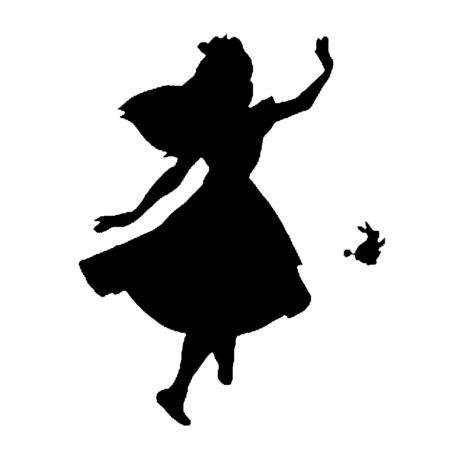

In [66]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
# Stopwords 제거

text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [68]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

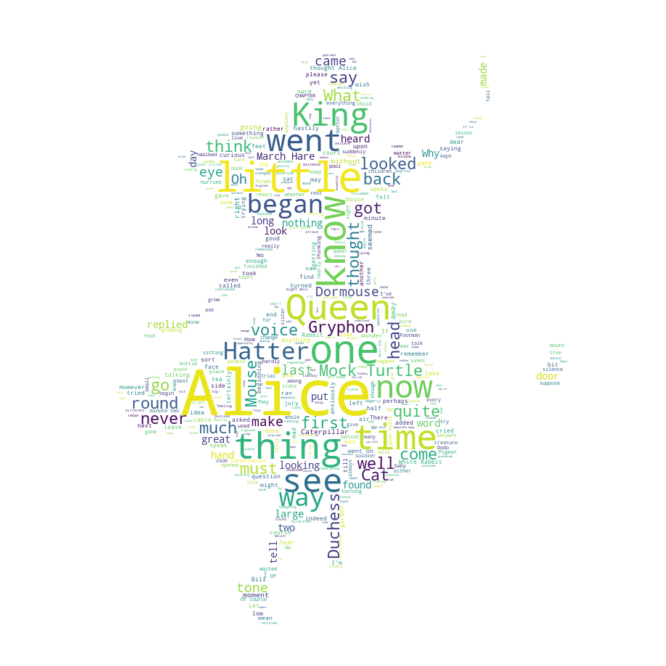

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [70]:
text = open('data\wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data\wc4. stormtrooper_mask.png'))

In [71]:

stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [72]:
# Stopwords 제거

text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [73]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()


In [74]:
# HSL : 색조(hue), 포화(saturation), 밝기(lightness)
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

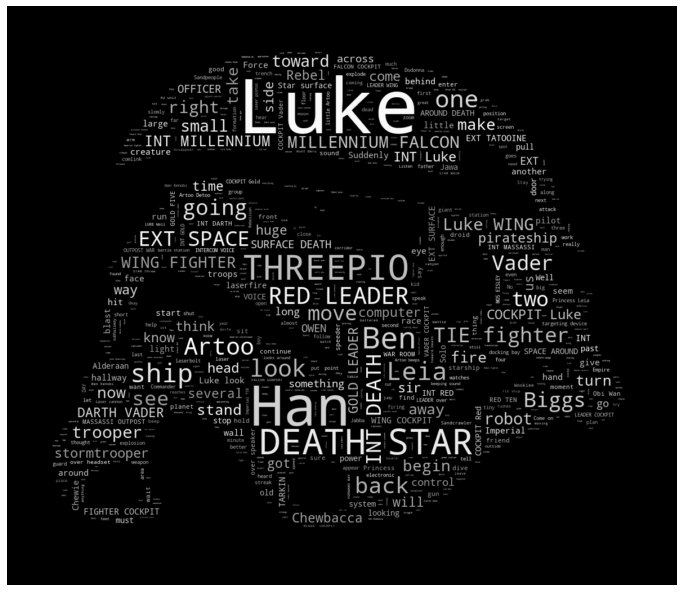

In [75]:

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

### 여자 친구 선물 고르기

In [81]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time


In [82]:
tmp1 = 'https://kin.naver.com/search/list.nhn?'
html = tmp1 + 'query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [83]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [88]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1,1000,10)):
    response = urlopen(html.format(num=n, key_word= urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl') 
    for line in tmp:
        line_str = line.text.replace('\t','').replace('\n','')
        present_candi_text.append(line_str)
    time.sleep(0.5)
                       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [89]:
with open("data/wc6.present_candi.txt","w",-1,'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [90]:
len(present_candi_text)

1000

In [91]:
present_candi_text

['여자친구 선물해주려구요2020.06.03.여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은... 사양해요  여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요... Q&A > 가족행사, 이벤트|답변수 5\xa0추천수 0',
 '20대여자친구선물 하카 전자담배... 2020.06.18.... 전자담배 중에 20대여자친구선물로 줄만한 것 찾고 있는데 하카 전자담배는 어떨지 궁금합니다.  안녕하세요 20대여자친구선물 하카 전자담배는 어떤지 고민중이시군요!... Q&A > 술, 담배|답변수 2\xa0추천수 0',
 '여자친구 선물 추천 부탁드립니다.(목걸이)2020.06.06.안녕하세요 여자친구 선물로 목걸이를 선물하고 싶어서 이렇게 글을 올립니다. 제가 쥬얼리 쪽은 브랜드가 어떻게 되어 있는지 잘 몰라서요. 20대 중반 저랑 동갑인... Q&A > 목걸이, 펜던트|답변수 6\xa0추천수 0',
 '여자친구 선물 추천 부탁드려요~2020.01.20.저기요...여자친구 선물 추천 좀 해 주세요~ 너무... 괜찮은 여자친구 선물 추천 부탁드립니다~  요즘 겨울이라서... 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨, 로션이... Q&A > 가족행사, 이벤트|답변수 39\xa0추천수 0',
 '여자친구 선물2020.04.29.여자친구 선물 로즈데이에 장미 외에 선물할 수 있는 게 있을까요? 아직 연애 초라서 여러가지 기념일을 많이 챙겨주고 싶네요.  저는 조금 특별한 선물을... #여자친구선물#여친선물#로즈데이선물Q&A > 가족행사, 이벤트|답변수 10\xa0추천수 0',
 '여자친구 선물로 감동적인게 뭐가... 2020.04.07.... 못하고요 여자친구 선물로 감동적인 것 좀 알려주세요  안녕하세요 여자친구 선물을 고민하고 계시군요 제가... 있더라고요 여자 친구 선물로 값비싼 선물보다 오래도록... Q&A > 목걸이, 펜던트|답변수 1\xa0추천수 0',
 '여자친구 선물 ..감동받게 하고 싶어요2020.01.0

In [92]:
present_text = ''

for each_line in present_candi_text:
    present_text += each_line +'\n'

In [93]:
from konlpy.tag import Okt
okt = Okt()


In [95]:
gifts = okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [100]:
import nltk
gift = nltk.Text(gifts, name = '여자 친구 선물')
print(len(gift.tokens))
print(len(set(gift.tokens)))

25752
705


In [102]:
sw_text = ' '.join(str(elem) for elem in set(gift.tokens))
print(sw_text)

구영 별로 비타민 준 치가 베스트 주위 로션 비비드 일찍 센스 반지 동안 에스티 다시 미투데이 참고 쇼 은행 만원 축하 포에버 화장품 취미 셜 스킨 캠코더 블랙 네 로즈데이 중동 해주시 생각 이자 꽃 처음 여성 핸드 종합 끼 니트 그냥 탈취 이면 반 금함 준비 저녁 슬 암거 며칠 해주 전역 어쨌든 여동생 지역 화이트데이 결혼 토닥토닥 용산 루나 고등학교 타이밍 플랫슈즈 물품 넥타이 잡화 주년 처럼 원래 펄찌 중학생 데이 기념 뷰티 교환학생 도움 막상 다이아 저가 오락 호가 모바일폰 쿠키 후 전화 상담 대비 리버 샤넬 의미 에센스 초등학생 편지 추천 동갑 시계 홀로 부담 불가리 선 폰 세시 음식 지갑 가디건 봣 규어 안나 핸드폰 제주도 전자담배 코스 빵 문구 마음 교통 중고 체크 학교생활 포장 근방 장미꽃 편도 음향 래서 드림캐쳐 사려 글구 사주면 저기 귀걸이 감동 가발 폭시 지방선거 용도 도대체 차라리 계획 루미 이요 현금 연락 가요 재료 하루 돈 초콜렛 세럼 최대 달무드등 겸 나중 옷 접 신경 빼 초반 누가 발찌 사랑 쥬니버 학년 햇빛 시티 수제 포함 전문 등등 검 그것 다른 문제 확인 주문 미만 연상연하 리얼 영화 음질 쪽 확행 바 갤럭시 클러치 민원 루이까또즈 기분 중지 인기 박 하루하루 최고 포토 아래 펜션 제일 곧 우정 거나 활용 펜던트 결과 송이 분 정성 부 가장 피부 겨울 광장 제격 렐라 버스 만들기 서여 커플티 광역 가방 셀 자 학생 벌써 게이 파운데이션 예상 수수 플립 패션 이번 톤 언니 달 인 티나 실버 미술 일주일 톰 건강 지식인 만화 장미 초등학교 액션 용법 걸 고 워터 학기 명품 대충 데이트 밍 색깔 서울 번 첫 구 르블랑 목도리 이벤트 상자 악세사리 가지 이름 피스 무스 전부 겟잇뷰티 제 저 티니 고생 채팅 연인 고급 작업 얘기 그 마디 더 상큼 다음주 주니 백화점 독립 둿 줄 고해 하니 아이템 사업자 자몽 퍼온거 틴트 피 무엇 빼빼로데이 제외 약 고수 맥 계절 한지 팩트 행동 신고 내내 미리 게 기도 초딩 오세아니아 나이 마우스패드 

In [112]:
sm_text = ' 별로  준 치가 베스트 주위   일찍 센스 반지 동안 에스티 다시 미투데이 참고 쇼 은행 만원 축하 포에버  취미 셜  블랙 네 로즈데이 중동 해주시 생각 이자  처음 여성 핸드 종합 끼  그냥 탈취 이면 반 금함 준비 저녁 슬 암거 며칠 해주 전역 어쨌든 여동생 지역 화이트데이 결혼 토닥토닥 용산 루나 고등학교 타이밍  물품  잡화 주년 처럼 원래 펄찌 중학생 데이 기념 뷰티 교환학생 도움 막상 다이아 저가 오락 호가 모바일폰 쿠키 후 전화 상담 대비 리버 샤넬 의미 에센스 초등학생 편지 추천 동갑  홀로 부담 불가리 선 폰 세시 음식 지갑 가디건 봣 규어 안나 제주도 코스 빵 문구 마음 교통 중고 체크 학교생활 포장 근방 편도 음향 래서 드림캐쳐 사려 글구 사주면 저기 감동 폭시 지방선거 용도 도대체 차라리 계획 루미 이요 연락 가요 재료 하루 돈 초콜렛 세럼 최대 달무드등 겸 나중 옷 접 신경 빼 초반 누가 사랑 쥬니버 학년 햇빛 시티 수제 포함 전문 등등 검 그것 다른 문제 확인 주문 미만 연상연하 리얼 영화 음질 쪽 확행 바 민원 중지 인기 박 하루하루 최고 포토 아래 펜션 제일 곧 우정 거나 활용 펜던트 결과 송이 분 정성 부 가장 피부 겨울 광장 제격 렐라 버스 만들기 서여 광역 가방 셀 자 학생 벌써 게이 예상 수수 패션 이번 톤 언니 달 인 티나 실버 미술 일주일 톰 건강 지식인 만화 장미 초등학교 액션 용법 걸 고 워터 학기 명품 대충 데이트 밍 색깔 서울 번 첫 구 르블랑 목도리 이벤트 상자 악세사리 가지 이름 피스 무스 전부 겟잇뷰티 제 저 티니 고생 채팅 연인 고급 작업 얘기 그 마디 더 상큼 다음주 주니 백화점 독립 둿 줄 고해 하니 아이템 사업자 자몽 퍼온거 틴트 피 무엇 빼빼로데이 제외 약 고수 맥 계절 한지 팩트 행동 신고 내내 미리 게 기도 초딩 오세아니아 나이 마우스패드 님들 여자친구 발렌타인 정도 금 중반 구류 고요 경우 답변 화장 질문 디올 스카프 떄 아이디어 볶음 존경 요즘 술 생로랑 블루투스 벨벳 카드 졸업식 대해 이하 중후 치 의식 고삼 하트 둘 혹시 애니메이션 중국 성인 사양 좀 꼭 맛 안주 심즈 명절 메이커 파티 점 풍속 속옷 고향 초콜릿 덕후 대학 컬러 얼마 의류 향 홍 이내 시내 정 크게 날씨 쇼핑 티 재회 건즈더듀얼 현재 집업 보증 사람과 말 산물 무협 최근 노트북 꿈 우편 를 비밀연애 기념일 레몬 대면 수 하카 중 라면 정해 스마트폰 전후 건조과일 관리 기타 여의 방송 진주 오빠 메트로 대학생 남자 매일 영구 기 밥 사람 힘 곳 괸찮치만 용 네이션 테크 조언 브랜드 길찾기 놀이 진 용인 체형 발레 찬 순간 움 세트 병영 대학입학 해도 그랜피 건 쭈니 그게 케이스 일 윈도우 마카롱 행정 사이트 여러가지 요 때매 스팅 대요 마크 해 말씀 시간 노미 괜찬을듯해 루이비통 때 가기 손가락 고등학생 기억 애 친 이틀 발렌타인데이 가족 레이스 이제 추억 생활 날 부분 머 진짜 유얼 먼저 하여튼 직접 거도 무료 사실 다담 제대로 링 신발 비스킷 소개 네이버 이직 뒤 만 제품 크롬 가격 지식 서도 것 강남 매 머그컵 강추 이 개 러브레터 친구 구피 인형 전 루 천연 지금 여친 달달 등 생일 살껀데 앤북 호 벨트 이성 시구 스 일주년 사서 포니테일 빨강 취업 스탠드 거의 졸업 회사 가성 무슨 후반 성의 려고 철 색 부탁 남성 방학 쥬얼리 청계 친한친구 가게 부다 잡고 팟 잉크 점점 너 후드 행사 거 정말 언제 류량 고민 초소 만년필 일단 가을 글 살이 정식 백 그동안 오렌지 적극 왜 대도 플라워 섬유 내공 주 영양 오즈 안 디자인 모델 다이어트 꽃집 뭘 공주 적 메모리 너클 종류 은근 완전 주류 가죽 외 소나기 크림 그룹 공예 무난 입문 가전 직업 뭐 색상 얼굴 리스트 성분 항상 영상 따뚜아쥬 군대 실용 거리 위 제이콥 택배 한편 립스틱 여행 담배 우선 양해 저번 또 쪼금 여름 커플 의견 한번 용품 부모님 살 브드 여자 한민 목 크리스마스 모두 전여자친구 토 원데이 오늘 상품 메세지 데 마리오 초 연말 꾸띠르 메이크업 때문 연애 로 함 김 선물 투맨 코튼 당장 반나절 자주 욕설 음 값 땜 인터넷 이중 양산 하나 티셔츠 럼 통화 코미디 조금 손바닥 비 예비 드림 프리저 군 다음 블랙베리 기초 향기'

In [113]:
stop_word = sw_text.split()

In [117]:
# Stopwords 제거

text_ = [gift for gift in gifts if gift not in stop_word]
gift.vocab().most_common(50)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1955),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 520),
 ('결혼', 379),
 ('고민', 289),
 ('상담', 139),
 ('이성', 137),
 ('쥬니버', 127),
 ('네이버', 122),
 ('용법', 122),
 ('가족', 91),
 ('이벤트', 91),
 ('행사', 88),
 ('내공', 78),
 ('고', 75),
 ('중학생', 71),
 ('초', 66),
 ('문구', 65),
 ('만년필', 63),
 ('미술', 63),
 ('용품', 63),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16)]

In [ ]:

data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()